In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Normal Optimisation CSVs & Data Cleaning
---

In [33]:
random_df = pd.read_csv('../results/01_baseline/random_search_results.csv')
random_df


,trial_id,accuracy,trial_duration_in_seconds,learning_rate,warmup_ratio,rank,alpha,dropout,target_modules
0,1,0.4505,59.706254,0.000015,0.06,4,16,0.05,"['q_lin', 'v_lin']"
1,2,0.6775,58.672194,0.000064,0.00,16,32,0.00,"['q_lin', 'v_lin']"
2,3,0.7710,68.693386,0.000109,0.10,2,16,0.20,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']"
3,4,0.7675,68.674055,0.000089,0.06,2,32,0.10,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']"
4,5,0.6895,59.682369,0.000086,0.10,24,16,0.05,"['q_lin', 'v_lin']"
5,6,0.6425,67.917479,0.000022,0.10,16,96,0.10,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']"
6,7,0.6640,68.157869,0.000035,0.10,24,32,0.05,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']"
7,8,0.7195,59.135170,0.000075,0.00,8,96,0.00,"['q_lin', 'v_lin']"
8,9,0.8780,68.311250,0.000173,0.06,4,64,0.10,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']"
9,10,0.7825,59.850900,0.000169,0.10,4,16,0.05,"['q_lin', 'v_lin']"


In [34]:
# Data Cleaning
pso_df = pd.read_csv('../results/02_pso/initial_results.csv')
pso_df = pso_df.rename(columns={
    'val_accuracy' : 'accuracy',
    'pso_epoch' : 'generation'
})
pso_df



,learning_rate,warmup_ratio,rank,alpha,dropout,target_modules,trial_id,accuracy,generation
0,0.000081,0.10,16,32,0.00,"['q_lin', 'v_lin']",1,0.7195,1
1,0.000168,0.00,2,8,0.05,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",2,0.8005,1
2,0.000097,0.10,2,32,0.10,"['q_lin', 'v_lin']",3,0.7155,1
3,0.000068,0.00,16,32,0.00,"['q_lin', 'v_lin']",4,0.6840,1
4,0.000114,0.00,24,64,0.20,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",5,0.8455,1
...,...,...,...,...,...,...,...,...,...
95,0.000200,0.10,4,96,0.00,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",96,0.9045,5
96,0.000200,0.10,8,96,0.00,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",97,0.8960,5
97,0.000200,0.06,8,96,0.00,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",98,0.8905,5
98,0.000010,0.10,8,96,0.00,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",99,0.5495,5


In [35]:

rcga_df = pd.read_csv('../results/03_rcga-blx-alpha/rcga_results.csv')
rcga_df

,generation,trial_id,accuracy,learning_rate,warmup_ratio,rank,alpha,dropout,target_modules
0,1,1,0.7420,0.000081,0.00,8,96,0.0,"['q_lin', 'v_lin']"
1,1,2,0.7280,0.000095,0.10,8,32,0.2,"['q_lin', 'v_lin']"
2,1,3,0.8110,0.000124,0.10,24,16,0.2,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']"
3,1,4,0.8975,0.000188,0.06,16,96,0.0,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']"
4,1,5,0.6970,0.000126,0.00,16,8,0.0,"['q_lin', 'v_lin']"
...,...,...,...,...,...,...,...,...,...
95,5,96,0.9055,0.000224,0.00,16,96,0.0,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']"
96,5,97,0.9015,0.000230,0.00,16,96,0.0,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']"
97,5,98,0.8915,0.000203,0.00,16,96,0.0,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']"
98,5,99,0.8650,0.000112,0.00,8,96,0.0,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']"


In [36]:
shade_df = pd.read_csv('../results/04_SHADE/shade_optimization_results.csv')
# Data Cleaning
shade_df

,learning_rate,warmup_ratio,rank,alpha,dropout,target_modules,trial_id,generation,accuracy
0,0.000131,0.074782,1.372396,1.113822,2.938520,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",1,1,0.7980
1,0.000180,0.259947,2.105390,0.148688,0.872366,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",2,1,0.8225
2,0.000015,0.594525,3.242923,2.719258,0.879558,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",3,1,0.5490
3,0.000164,0.019431,4.021038,3.483716,1.357600,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",4,1,0.8130
4,0.000192,1.006418,0.462802,0.482615,3.381503,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",5,1,0.8225
...,...,...,...,...,...,...,...,...,...
95,0.000200,0.000000,24.000000,96.000000,0.000000,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",96,4,0.8940
96,0.000200,0.000000,24.000000,96.000000,0.000000,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",97,4,0.9005
97,0.000169,0.000000,24.000000,96.000000,0.000000,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",98,4,0.8985
98,0.000188,0.000000,24.000000,96.000000,0.000000,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",99,4,0.8875


# Load Seed CSVs & Data Cleaning
---

In [37]:
# All seed accuracies aren't needed so no need to clean here
random_seed_df = pd.read_csv('../results/01_baseline/robustness_verification_results.csv')
random_seed_df

,trial_id,original_accuracy,mean_accuracy,std_accuracy,all_seed_accuracies,learning_rate,warmup_ratio,rank,alpha,dropout,target_modules
0,9,0.8780,0.876667,0.003009,"[0.878, 0.8725, 0.8795]",0.000173,0.06,4,64,0.10,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']"
1,14,0.8055,0.797000,0.002858,"[0.801, 0.7945, 0.7955]",0.000198,0.00,4,32,0.00,"['q_lin', 'v_lin']"
2,10,0.7825,0.776833,0.002867,"[0.7735, 0.7805, 0.7765]",0.000169,0.10,4,16,0.05,"['q_lin', 'v_lin']"
3,12,0.7740,0.768000,0.001472,"[0.7695, 0.7685, 0.766]",0.000097,0.10,16,96,0.10,"['q_lin', 'v_lin']"
4,3,0.7710,0.773333,0.004327,"[0.7725, 0.779, 0.7685]",0.000109,0.10,2,16,0.20,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']"


In [38]:
pso_seed_df = pd.read_csv('../results/02_pso/robust_results.csv')
pso_seed_df['target_modules'] = np.where(
    pso_seed_df['target_modules'] == 1,
    ['q_lin, v_lin, ffn.lin1, ffn.lin2'],  # Value if True (as a single string)
    ['q_lin, v_lin']                       # Value if False (as a single string)
)
pso_seed_df


,rank,learning_rate,warmup_ratio,rank_r,alpha,dropout,target_modules,original_accuracy,mean_accuracy,std_accuracy,seed_1_accuracy,seed_2_accuracy,seed_3_accuracy
0,1,0.0002,0.10,4,96,0.0,"q_lin, v_lin, ffn.lin1, ffn.lin2",0.9045,0.893333,0.002248,0.8915,0.8965,0.8920
1,2,0.0002,0.06,8,96,0.0,"q_lin, v_lin, ffn.lin1, ffn.lin2",0.8985,0.895167,0.003793,0.8965,0.8990,0.8900
2,3,0.0002,0.06,16,96,0.0,"q_lin, v_lin, ffn.lin1, ffn.lin2",0.8985,0.895833,0.001929,0.8950,0.8985,0.8940
3,4,0.0002,0.00,16,96,0.0,"q_lin, v_lin, ffn.lin1, ffn.lin2",0.8985,0.893833,0.001434,0.8920,0.8940,0.8955
4,5,0.0002,0.10,8,96,0.0,"q_lin, v_lin, ffn.lin1, ffn.lin2",0.8960,0.896500,0.003240,0.8980,0.8995,0.8920


In [39]:
rcga_seed_df = pd.read_csv('../results/03_rcga-blx-alpha/top5_re_evaluation_results.csv')
rcga_seed_df

,rank,learning_rate,warmup_ratio,rank_r,alpha,dropout,target_modules,original_accuracy,mean_accuracy,std_accuracy,seed_1_accuracy,seed_2_accuracy,seed_3_accuracy
0,1,0.000224,0.0,16,96,0.0,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",0.9055,0.895667,0.004010,0.8960,0.8995,0.8915
1,2,0.000224,0.0,16,96,0.0,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",0.9020,0.897667,0.001041,0.8965,0.8980,0.8985
2,3,0.000235,0.0,16,96,0.0,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",0.9020,0.903667,0.008808,0.9085,0.8935,0.9090
3,4,0.000240,0.0,16,96,0.0,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",0.9020,0.901000,0.004272,0.9005,0.9055,0.8970
4,5,0.000230,0.0,16,96,0.0,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",0.9015,0.899667,0.001258,0.8985,0.9010,0.8995


In [40]:
shade_seed_df = pd.read_csv('../results/04_SHADE/shade_top_solutions_multiseed.csv')
shade_seed_df['target_modules'] = np.where(
    shade_seed_df['target_modules'] == 1,
    ['q_lin, v_lin, ffn.lin1, ffn.lin2'],  # Value if True (as a single string)
    ['q_lin, v_lin']                       # Value if False (as a single string)
)
shade_seed_df

,rank,learning_rate,warmup_ratio,rank_r,alpha,dropout,target_modules,original_accuracy,mean_accuracy,std_accuracy,seed_1_accuracy,seed_2_accuracy,seed_3_accuracy
0,1,0.000200,0.0,24,96,0.0,"q_lin, v_lin, ffn.lin1, ffn.lin2",0.9000,0.897000,0.002944,0.8980,0.9000,0.8930
1,2,0.000174,0.0,24,96,0.0,"q_lin, v_lin, ffn.lin1, ffn.lin2",0.9000,0.894500,0.004708,0.9005,0.8890,0.8940
2,3,0.000169,0.0,24,96,0.0,"q_lin, v_lin, ffn.lin1, ffn.lin2",0.8985,0.894000,0.001225,0.8940,0.8955,0.8925
3,4,0.000185,0.0,24,96,0.0,"q_lin, v_lin, ffn.lin1, ffn.lin2",0.8985,0.892667,0.003424,0.8975,0.8905,0.8900
4,5,0.000200,0.0,24,96,0.0,"q_lin, v_lin, ffn.lin1, ffn.lin2",0.8980,0.893667,0.001841,0.8915,0.8960,0.8935


# Code
---

In [41]:
# optimisation time for algos
times = {
    "Random Search" : 21.08,
    "PSO" : 108.44,
    "RCGA BLX-Alpha" : 108.55,
    "SHADE" : 72.90,
}

In [42]:
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ALGO_NAMES = ["Random Search", "PSO", "RCGA BLX-Alpha", "SHADE"]

In [43]:
# helper function for cumulative maximum over evaluations

def best_so_far(df, acc_col='accuracy'):
    return df[acc_col].cummax()

In [44]:
# Convergence Plot -> Best Accuracy / Evaluations
"""
Plot convergence curves showing best accuracy found so far vs evaluations.

Parameters:
- dfs: list of DataFrames containing 'accuracy' column
- labels: list of algorithm names
- colors: list of colors for each algorithm
"""
def plot_convergence(dfs, labels, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']):
    
    plt.figure(figsize=(10, 6))
    
    for df, label, color in zip(dfs, labels, colors):
        bsf = best_so_far(df)
        evals = range(1, len(bsf) + 1)
        plt.plot(evals, bsf, label=label, color=color, linewidth=2)
        
    plt.xlabel('Function Evaluations', fontsize=12)
    plt.ylabel('Best Validation Accuracy', fontsize=12)
    plt.title('Convergence Plot: Best Accuracy vs Evals', fontsize=14)
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('optim_output/convergence_plot.png', dpi=300, bbox_inches='tight')
    plt.show()


In [45]:
"""
Bar chart comparing final best validation accuracy with error bars.

Parameters:
- seed_dfs: list of DataFrames with 'mean_accuracy' and 'std_accuracy' columns
            (these are the top-5 seed validation results)
- labels: list of algorithm names
- colors: list of colors for each algorithm
"""

def plot_final_performance(seed_dfs, labels, colors=COLORS):
    
    best_means = []
    best_stds = []
    
    for df in seed_dfs:
        best_means.append(df['mean_accuracy'].iloc[0])
        best_stds.append(df['std_accuracy'].iloc[0])
    
    x = np.arange(len(labels))
    width = 0.6
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(x, best_means, width, yerr=best_stds, color=colors,
                  capsize=5, error_kw={'linewidth': 2, 'capthick': 2})
    
    # Add value labels on bars
    for bar, mean, std in zip(bars, best_means, best_stds):
        height = bar.get_height()
        ax.annotate(f'{mean:.4f}\n±{std:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height + std),
                    ha='center', va='bottom', fontsize=9)
    
    ax.set_xlabel('Algorithm', fontsize=12)
    ax.set_ylabel('Best Validation Accuracy', fontsize=12)
    ax.set_title('Final Performance Comparison', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_ylim(bottom=min(best_means) - 0.02, top=max(best_means) + 0.025)
    ax.grid(True, axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('optim_output/final_performance.png', dpi=300, bbox_inches='tight')
    plt.show()
    

In [46]:
"""
Bar chart showing computational cost (total time) per algorithm.

Parameters:
- times_dict: dictionary mapping algorithm names to total time in minutes
- colors: list of colors for each algorithm
"""

def plot_training_cost(times_dict=times, colors=COLORS):
    
    labels = list(times_dict.keys())
    values = list(times_dict.values())
    
    x = np.arange(len(labels))
    width = 0.6
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(x, values, width, color=colors)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f} min',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)
    
    ax.set_xlabel('Algorithm', fontsize=12)
    ax.set_ylabel('Total Optimisation Time (minutes)', fontsize=12)
    ax.set_title('Computational Cost Comparison', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_ylim(bottom=0, top=max(values) * 1.15)
    ax.grid(True, axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('optim_output/training_cost.png', dpi=300, bbox_inches='tight')
    plt.show()

# Run Code
---

In [47]:
dfs_evolution = [random_df, pso_df, rcga_df, shade_df]
dfs_seeds = [random_seed_df, pso_seed_df, rcga_seed_df, shade_seed_df]

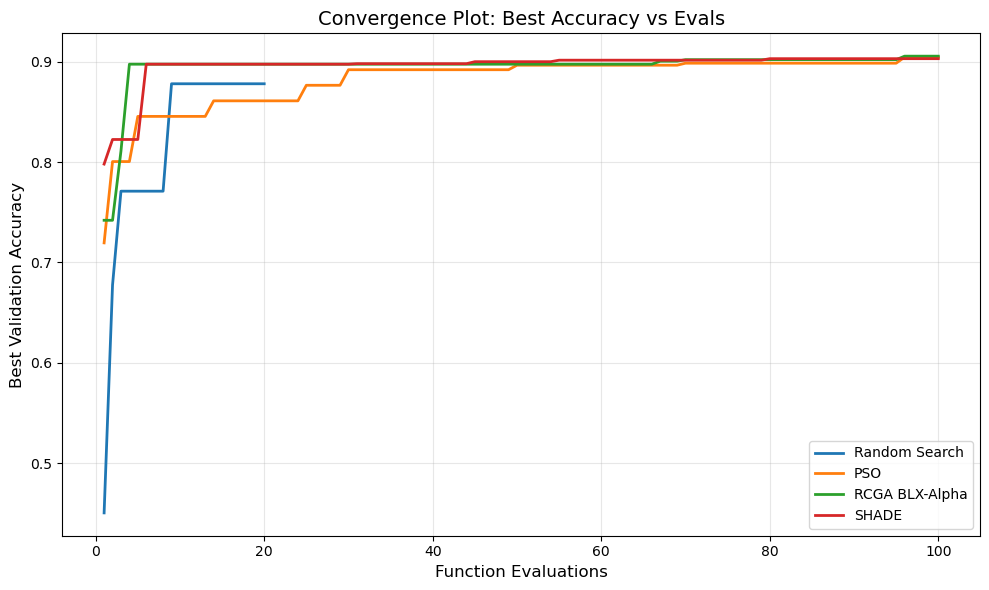

In [48]:
plot_convergence(dfs_evolution, ['Random Search', 'PSO', 'RCGA BLX-Alpha', 'SHADE'])

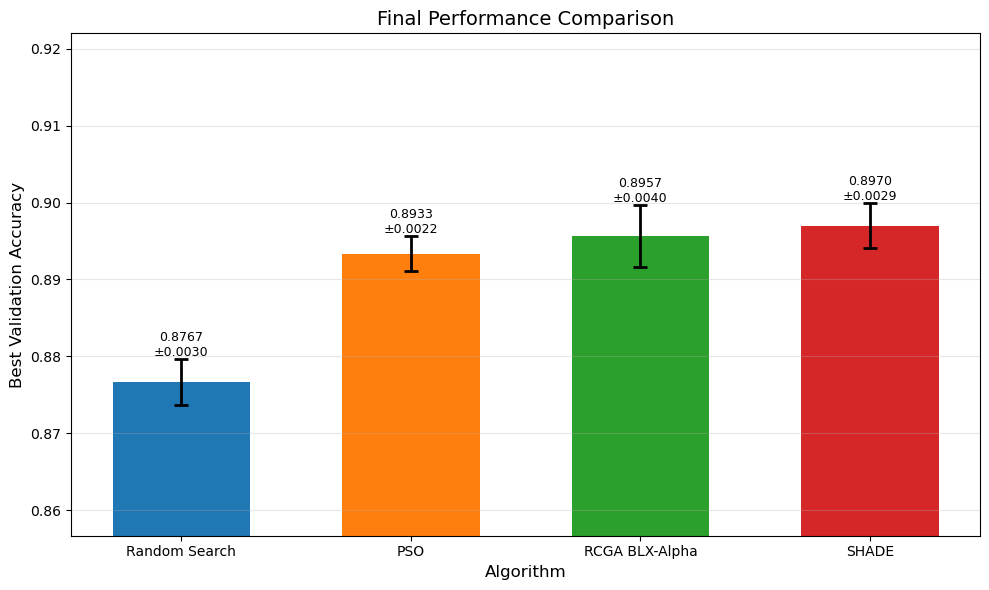

In [49]:
plot_final_performance(dfs_seeds, ['Random Search', 'PSO', 'RCGA BLX-Alpha', 'SHADE'])


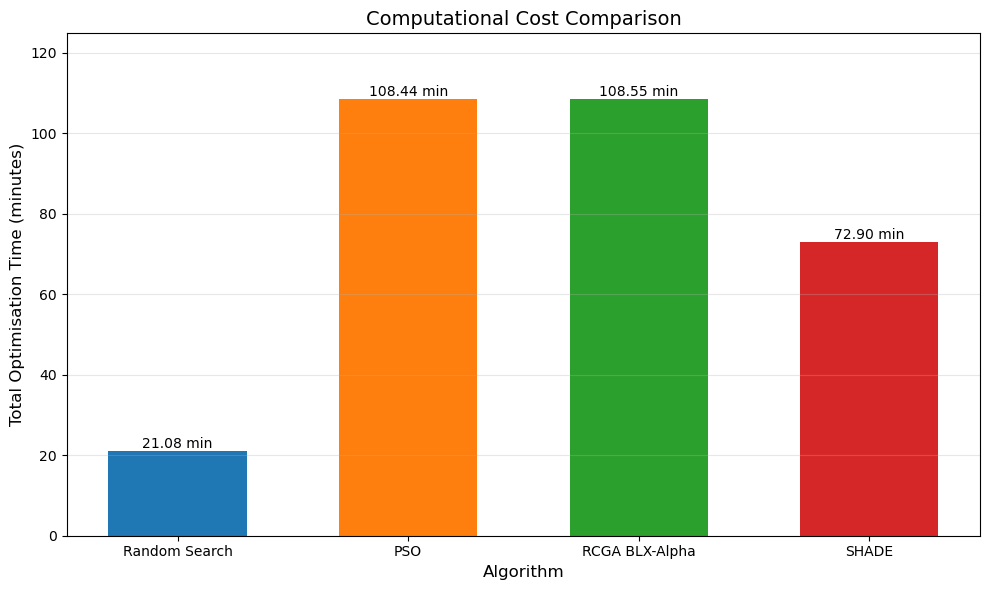

In [50]:
plot_training_cost()

In [52]:
pareto = pd.read_csv('/Users/stevenmain/Documents/1 - CompSciDegree/SEM1/CI_COM3013/CW/group_code/DistilBERT-Parameter-Efficient-FineTuning/results/05_NSGA2_results/pareto_front.csv')
pareto

,pareto_rank,solution_id,learning_rate,warmup_ratio,rank,alpha,dropout,target_modules,accuracy,trainable_params,error_rate
0,0,4,0.000200,0.10,8,96,0.0,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",0.9020,1111302.0,0.0980
1,0,2,0.000200,0.10,4,64,0.1,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",0.8955,853254.0,0.1045
2,0,3,0.000199,0.06,2,64,0.0,"['q_lin', 'v_lin', 'ffn.lin1', 'ffn.lin2']",0.8775,724230.0,0.1225
3,0,0,0.000183,0.10,4,64,0.1,"['q_lin', 'v_lin']",0.8215,668934.0,0.1785
4,0,1,0.000200,0.10,2,64,0.1,"['q_lin', 'v_lin']",0.8205,632070.0,0.1795
